# Prompt 1: Visualize statistics of your data

Build useful visualizations of the statistics of your data. How many images or videos do you have? What distribution of categories of interest exist in your data? When was the data collected? Are there multiple types or modalities of data?

First import useful packages

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# every time these files change, you need to restart the notebook kernel
# Hit the circle arrow Restart button in the toolbar
from metadata import Metadata 
import plotting

I'll be using the metadata from the [iWildCam 2022](https://www.kaggle.com/c/iwildcam2022-fgvc9) challenge as an example. 


We'll be looking at the training set only (since it has labels).

Let's load the metadata for the iWildCam 2022 training set and visualize some high-level statistics of the dataset.

In [15]:
metadata = Metadata('metadata/iwildcam2022_train_annotations.json')

In [16]:
metadata.show()

High-level statistics:

Images: 201399
Categories: 204
Annotations: 201399
Animal images: 131930
Empty images: 69469
Locations: 323
Sequences: 36292


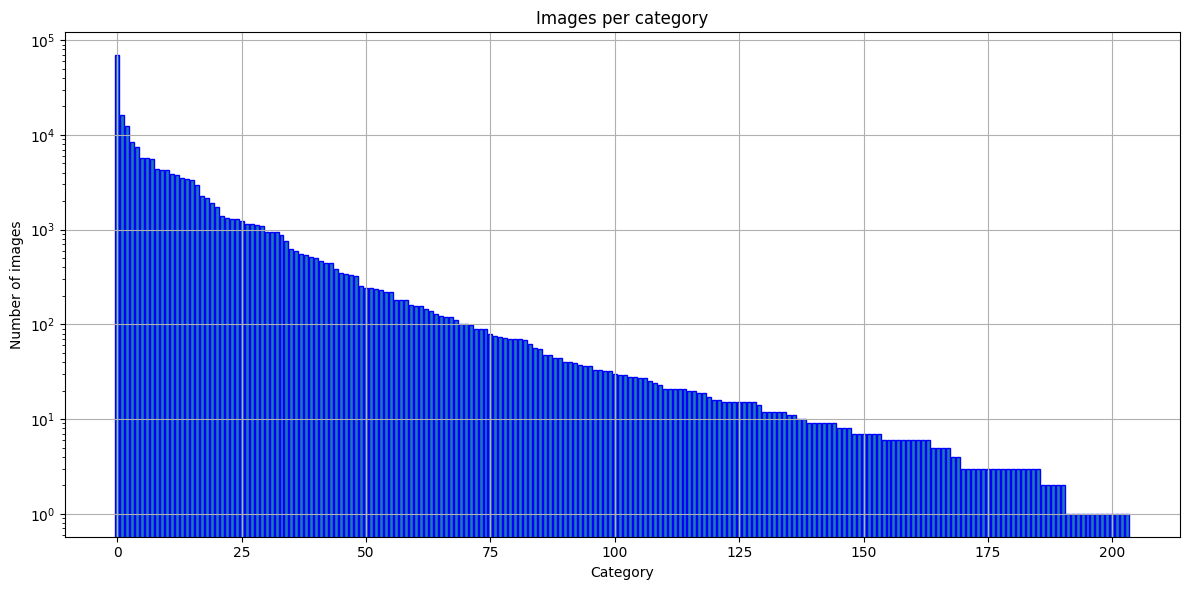

In [17]:
plotting.plot_images_per_category(metadata)

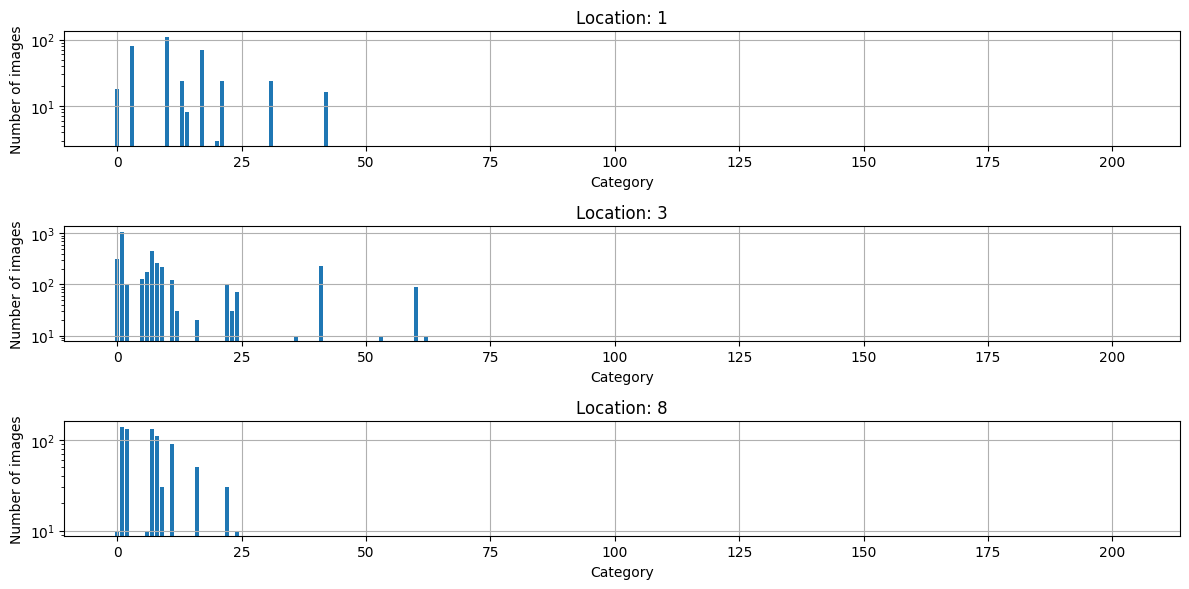

In [18]:
plotting.plot_images_per_category_per_location(metadata)

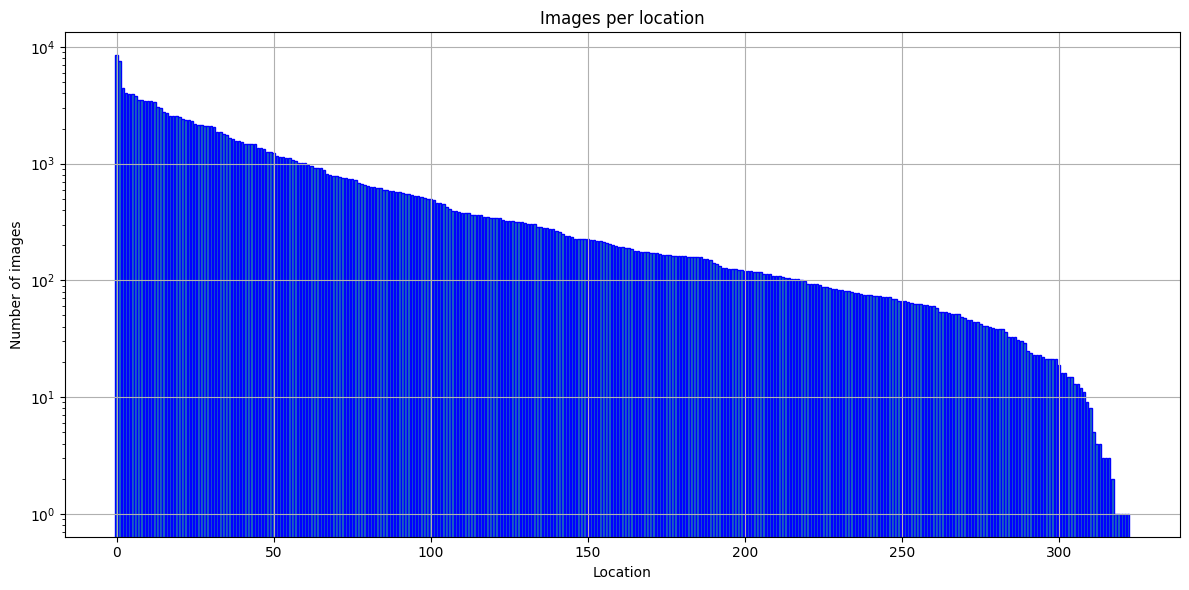

In [19]:
plotting.plot_images_per_location(metadata)

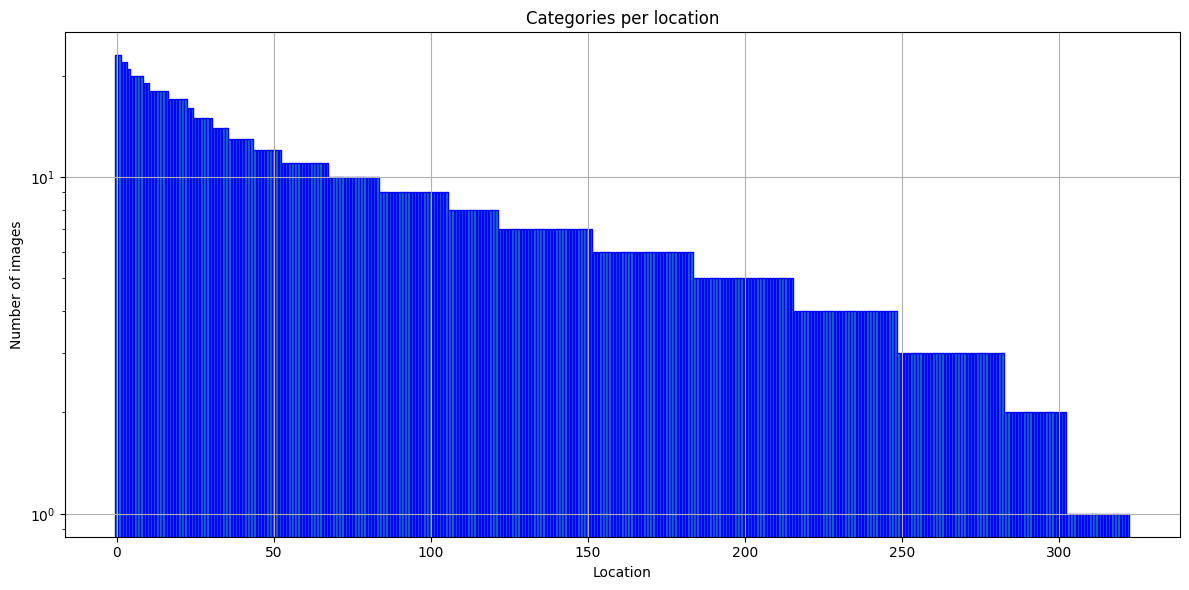

In [20]:
plotting.plot_categories_per_location(metadata)

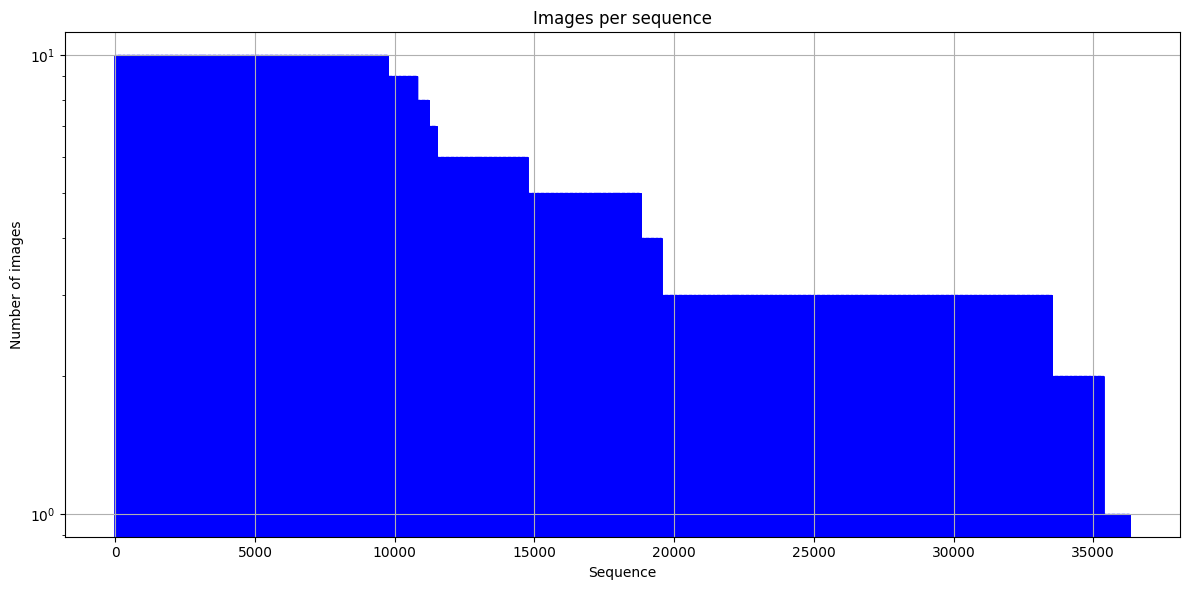

In [21]:
plotting.plot_images_per_sequence(metadata)

In [22]:
print(len(metadata.sequences))

images_per_sequence = {seq:[] for seq in metadata.sequences}
for im in metadata.images:
    images_per_sequence[im['seq_id']].append(im['id'])

non_empty_sequences = []
empty_sequences = []
for seq in metadata.sequences:
  seq_categories = [metadata.im_to_cat[im] for im in images_per_sequence[seq]]
  if all([cat == 0 for cat in seq_categories]):
    empty_sequences.append(seq)
  else:
    non_empty_sequences.append(seq)
print(len(empty_sequences))
print(len(non_empty_sequences))

36292
15789
20503


Load detection results from the MegaDetector (precomputed for the competition)

In [23]:
with open('metadata/iwildcam2022_mdv4_detections.json') as f:
  detections = json.load(f)

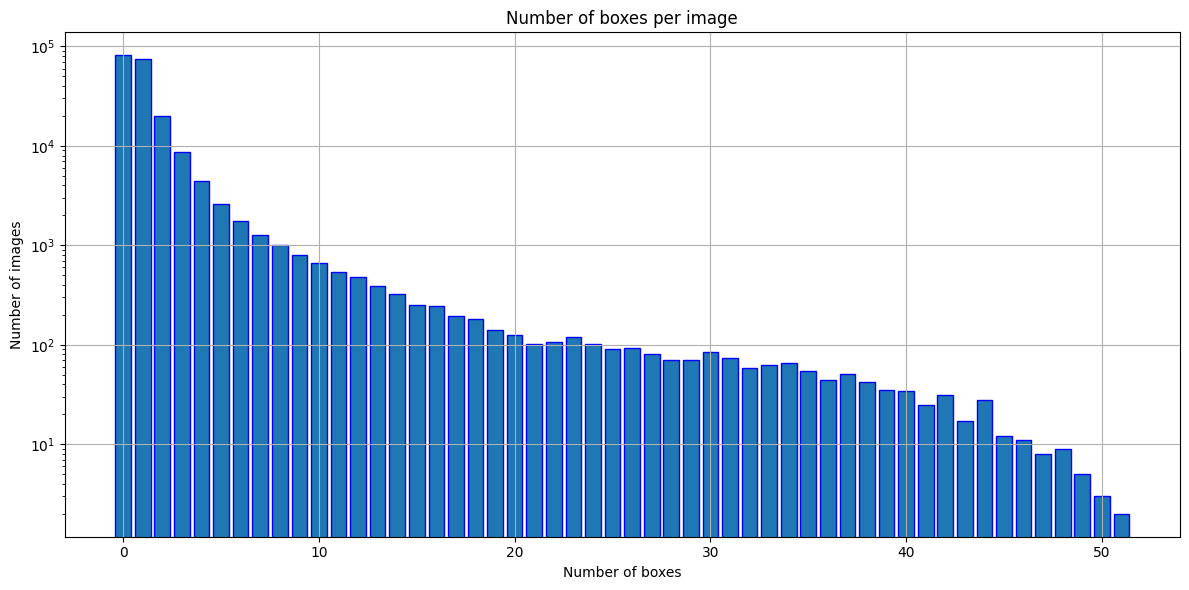

In [24]:
plotting.plot_boxes_per_image(detections, metadata)

# Prompt 2: load one of your images or videos and visualize it

I can provide some starter code here if needed.

If you have annotations, you might also want to visualize the annotations!